# ¿Cómo afectó el Covid 19 a la educación (básica y secundaria) en Ecuador?

In [1]:
# Load modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data
path = '/work/covid-ec/data/processed/'

positives = pd.read_pickle(path + 'positives.pkl')
vaccines = pd.read_pickle(path + 'vaccines.pkl')
deaths = pd.read_pickle(path + 'deaths.pkl')
closures_education = pd.read_pickle(path + 'closures_education.pkl')
education_ec = pd.read_pickle(path + 'education_ec.pkl')
students = pd.read_pickle(path + 'students.pkl')

In [3]:
print(f'Positivos: {positives["acumulados"].max()}\nFallecimientos: {deaths["accumulated"].max()}')

Positivos: 546554
Fallecimientos: 33593


## Vista general a la evolución del Covid-19 y la respuesta de los centros educativos

Durante la pandemia, Ecuador ha tenido un total de **546.554 casos positivos** y **33.593 fallecimientos** hasta la fecha.

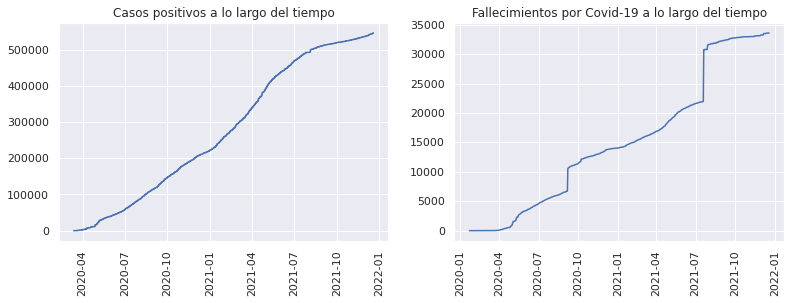

In [4]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=[13, 4])
ax[0].plot(positives.created_at, positives.acumulados)
ax[0].set_title('Casos positivos a lo largo del tiempo')
ax[1].plot(deaths.date, deaths.accumulated)
ax[1].set_title('Fallecimientos por Covid-19 a lo largo del tiempo')
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=90)
plt.show()

Por lo que se tuvo que tomar medidas y por varios meses se entró en cuarentena, cerrando todo tipo de establecimientos, entre ellos, los educativos. A la fecha actual, se permite la circulación normal con distanciamiento social. Pero a las unidades educativas aún no se les permite abrir con normalidad, sino que tienen que hacerlo de manera parcial.

En este gráfico se muestra la evolución de las aperturas, cierres y aperturas parciales de los centros educativos durante la pandemia:

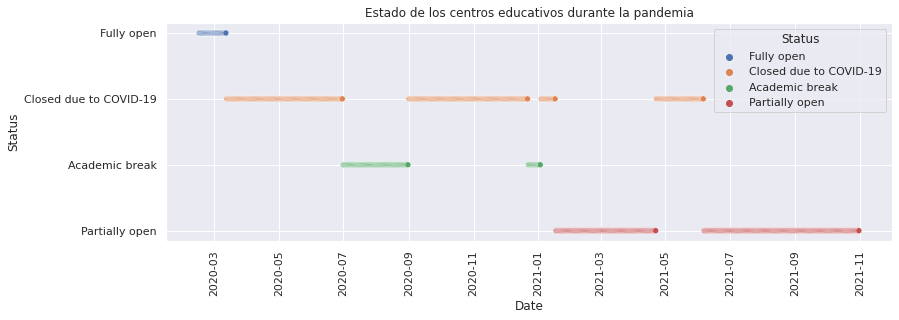

In [5]:
plt.figure(figsize=[13, 4])
sns.scatterplot(data=closures_education, x='Date', y='Status', hue='Status')
plt.title('Estado de los centros educativos durante la pandemia')
plt.xticks(rotation=90)
plt.show()

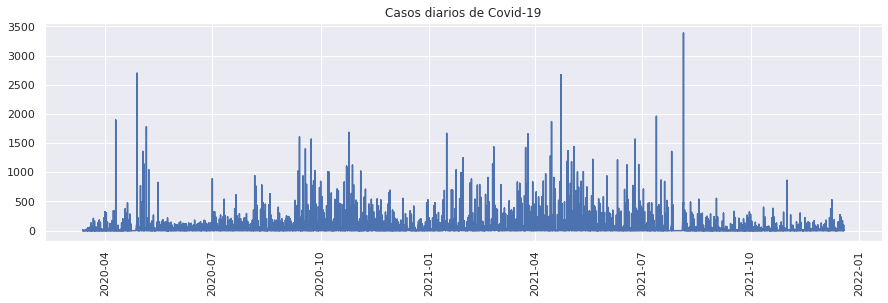

In [6]:
plt.figure(figsize=[15,4])
plt.plot(positives.created_at, positives.nuevas)
plt.title('Casos diarios de Covid-19')
plt.xticks(rotation=90)
plt.show()

Se puede notar en las gráficas, cada que hay un aumento de contagios elevado, se cierra por completo los centros educativos. Esto hace que los contagios diarios disminuyan, pero cuando se vuelven a abrir, los contagios vuelven a elevarse (un claro ejemplo en enero de 2021). Por lo que fue acertado el cierre total por parte de las autoridades.

También se puede apreciar como a partir de aproximadamente julio del 2021 la cantidad de personas vacunadas emepezó a ser elevada. Por esto los centros educativos han estado parcialmente abiertos hasta la fecha.

Acá puedes poner algo de correlación.



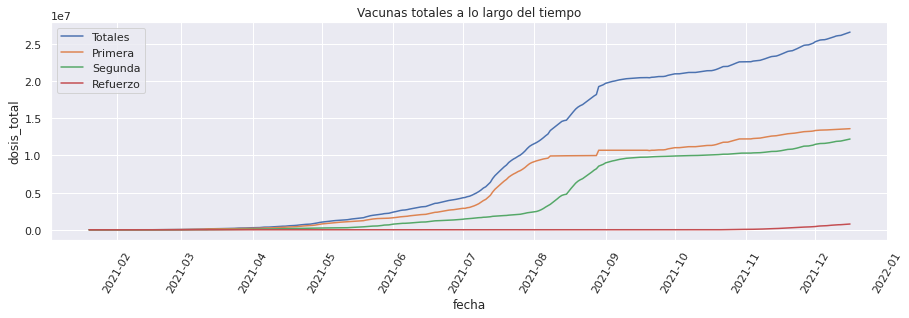

In [7]:
plt.figure(figsize=[15, 4])
sns.lineplot(data=vaccines, x='fecha', y='dosis_total',  label='Totales')
sns.lineplot(data=vaccines, x='fecha', y='primera_dosis', label='Primera')
sns.lineplot(data=vaccines, x='fecha', y='segunda_dosis', label='Segunda')
sns.lineplot(data=vaccines, x='fecha', y='refuerzo', label='Refuerzo')
plt.title('Vacunas totales a lo largo del tiempo')
plt.xticks(rotation=60)
plt.show()

Pero desde el inicio del confinamiento, las escuelas y colegios han estado totalmente cerradas más del 45% del tiempo. Y un 38% del tiempo han estado parcialmente abiertas.

Esto debió afectar a los estudiantes.

## Análisis del progreso de los estudiantes en Ecuador

Esta es la evolución de los estudiantes aprobados, reprobados, y que abandonaron la escuela entre 2009 y 2021:

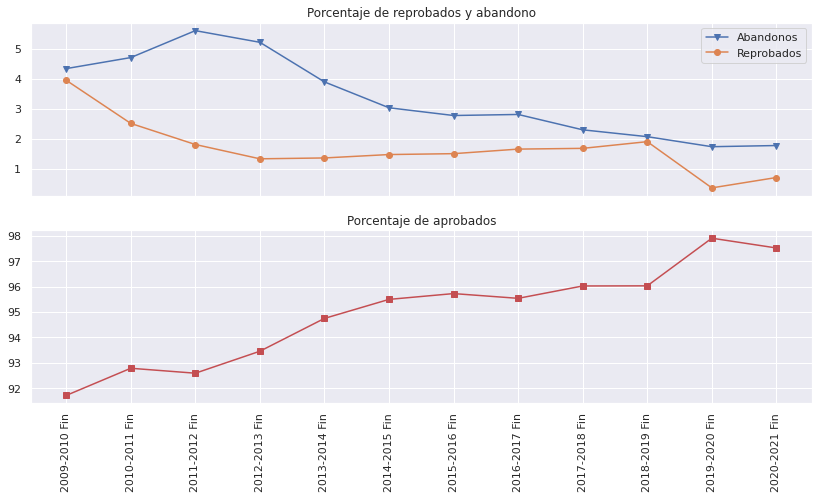

In [9]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=[14,7])
ax[0].plot(students.index, students.p_dropout, marker='v', label='Abandonos')
ax[0].plot(students.index, students.p_reproved, marker='o', label='Reprobados')
ax[0].legend()
ax[0].set_title('Porcentaje de reprobados y abandono')
ax[1].plot(students.index, students.p_promoted, marker='s', c='r')
ax[1].set_title('Porcentaje de aprobados')

plt.xticks(rotation=90)
plt.show()

Históricamente, Ecuador ha ido mejorando el acceso a la educación, por ello hay un progreso positivo en los aprobados y estudiantes que abandonan la escuela. Pero entre el periodo `2019-2020` y `2020-2021`, correspondientes a la pandemia, hay 3 puntos interesantes:
1. Hay una tendecia positiva de mayor número de aprobados, pero para `2019-2020` de repente sube. Probablemente porque cuando los centros educativos cerraron por la pandemia, no hubo una buena respuesta ni clases virtuales para la _mayoría de establecimientos_ y decidieron dar por terminado el año lectivo aprobando a todos los estudiantes. Pero para `2020-2021` el número de aprobados vuelve a bajar, aunque sigue siendo mayor a la tendencia de años anteriores. ¿Por qué? Ahora sí hubo clases virtuales. La razón de que siga siendo mayor que en años anteriores en el siguiente punto. 👇
2. Aquí se nota algo muy interesante en la gráfica de reprobados. Desde `2012` hasta `2019` cada año hubo un mayor porcentaje de reprobados. Pero entre `2020 y 2021` se rompe la tendencia y ahora los estudiantes reprueban mucho menos (exceptuando `2019-2020` que por defecto aprobaron a la mayoría por el cierre). La hipótesis es que para aprobar se requiere sacar una nota mínima en exámenes y deberes; con las clases virtuales es muy sencillo copiar ambos items y aprobar.
3. El que quizá sea el punto más interesante es el de abandonos. Hay más abandonos que reprobados. Desde `2011` ha habido una tendencia fuerte de cada vez menos estudiantes que abandonan. En el año 2020 parece que la tendencia sigue por lo de _todos aprobados_, pero para `2021`, cuando volvimos a la "normalidad", el porcentaje de abandonos incrementó, lo que significa que muchos estudiantes de escuelas y colegios dejaron sus estudios.

El resto del análisis va para ese tercer punto. Entender qué grupo social conforma ese incremento de abandonos.

## Grupos sociales afectados por la pandemia

Primero veamos cuántos estudiantes abandonaron los estudios en 2020 y en 2021.

In [27]:
students_es = students.rename(columns={'dropout': 'Número de abandonos', 'p_dropout': 'Porcentaje de abandonos'})
print(students_es[['Número de abandonos', 'Porcentaje de abandonos']].iloc[-2:])

               Número de abandonos  Porcentaje de abandonos
Periodo                                                    
2019-2020 Fin                75295                 1.732186
2020-2021 Fin                75566                 1.771261


Ahora vamos a centrarnos en lo que pasó en 2020 y 2021 en varias categorías:
- Sostenimiendo del centro educativo (particular o no).
- Área urbana y rural.
- Jornada (matutina o no).

### Tipo de sotenimiento del centro educativo

In [61]:
# 2020
education_2020 = education_ec.query('Periodo == "2019-2020 Fin"')
sostenimiento_2020 = education_2020.groupby('Sostenimiento')[['Total_estudiantes', 'Abandono']].sum()
sostenimiento_2020['Porcentaje_abandono'] = round(sostenimiento_2020['Abandono'] / sostenimiento_2020['Total_estudiantes'] * 100, 2)
print(sostenimiento_2020)

               Total_estudiantes  Abandono  Porcentaje_abandono
Sostenimiento                                                  
Fiscal                   3183498     55258                 1.74
Fiscomisional             283556      7724                 2.72
Municipal                  34650       508                 1.47
Particular                845116     11805                 1.40


In [60]:
# 2021
education_2021 = education_ec.query('Periodo == "2020-2021 Fin"')
sostenimiento_2021 = education_2021.groupby('Sostenimiento')[['Total_estudiantes', 'Abandono']].sum()
sostenimiento_2021['Porcentaje_abandono'] = round(sostenimiento_2021['Abandono'] / sostenimiento_2021['Total_estudiantes'] * 100, 2)
print(sostenimiento_2021)

               Total_estudiantes  Abandono  Porcentaje_abandono
Sostenimiento                                                  
Fiscal                   3263019     58538                 1.79
Fiscomisional             267410      8380                 3.13
Municipal                  33558       270                 0.80
Particular                702238      8378                 1.19


In [51]:
# Comparar 2020 con 2021
no_fiscal = sostenimiento_2021.iloc[[1,3],0].sum() - sostenimiento_2020.iloc[[1,3],0].sum()
fiscal = sostenimiento_2021.iloc[[0,1],0].sum() - sostenimiento_2020.iloc[[0,1],0].sum()
print(f'Abandonos centros no fiscales: {no_fiscal}\nAumento centros fiscales: {fiscal}')

Abandonos centros no fiscales: -159024
Aumento centros fiscales: 63375


- Entre 2020 y 2021 `159.024` estudiantes dejaron las escuelas particulares y fiscomisionales. Esto puede ser porque sus padres perdieron su capacidad adquisitiva durante la pandemia y pasaron de clase media alta a clase media.
- Además, hubo un aumento de `63.375` estudiantes en instituciones fiscales.
- En 2021 `58.538 (1.71%)` estudiantes abandonaron las escuelas fiscales, mientras que para el resto de instituciones el número permanece por debajo de `~8.400`. Esto denota que los estudiantes que abandonan mayormente podrían estar en una clase media baja.

### Áreas urbanas y rurales

In [59]:
# 2020
area_2020 = education_2020.groupby('Area')[['Total_estudiantes', 'Abandono']].sum()
area_2020['Porcentaje_abandono'] = round(area_2020['Abandono'] / area_2020['Total_estudiantes'] * 100, 2)
print(area_2020)

            Total_estudiantes  Abandono  Porcentaje_abandono
Area                                                        
RuralINEC             1020625     16272                 1.59
UrbanaINEC            3326195     59023                 1.77


In [58]:
# 2021
area_2021 = education_2021.groupby('Area')[['Total_estudiantes', 'Abandono']].sum()
area_2021['Porcentaje_abandono'] = round(area_2021['Abandono'] / area_2021['Total_estudiantes'] * 100, 2)
print(area_2021)

            Total_estudiantes  Abandono  Porcentaje_abandono
Area                                                        
RuralINEC             1017161     16091                 1.58
UrbanaINEC            3249064     59475                 1.83


La crisis afectó relativamente igual a los estudiantes de la ciudad y el campo. Hay solo una pequeña diferencia de aproximadamente el `~0.2%` de mayor impacto en la ciudad.

### Tipo de jornada



In [62]:
# 2020
jornada_2020 = education_2020.groupby('Jornada')[['Total_estudiantes', 'Abandono']].sum()
jornada_2020['P_abandono'] = round(jornada_2020['Abandono'] / jornada_2020['Total_estudiantes'] * 100, 2)
print(jornada_2020)

                                Total_estudiantes  Abandono  P_abandono
Jornada                                                                
Matutina                                  2031442     31352        1.54
Matutina y Vespertina                     1758067     27850        1.58
Matutina, Vesperina y Nocturna             425038     11674        2.75
Matutino y Nocturno                         95443      2196        2.30
Nocturna                                     6977      1080       15.48
Vespertina                                  27741       826        2.98
Vespertina y Nocturna                        2112       317       15.01


In [63]:
# 2021
jornada_2021 = education_2021.groupby('Jornada')[['Total_estudiantes', 'Abandono']].sum()
jornada_2021['P_abandono'] = round(jornada_2021['Abandono'] / jornada_2021['Total_estudiantes'] * 100, 2)
print(jornada_2021)

                                Total_estudiantes  Abandono  P_abandono
Jornada                                                                
Matutina                                  1903075     27606        1.45
Matutina y Vespertina                     1787366     30857        1.73
Matutina, Vesperina y Nocturna             440179     12103        2.75
Matutino y Nocturno                        102781      3279        3.19
Nocturna                                     5713       926       16.21
Vespertina                                  24801       609        2.46
Vespertina y Nocturna                        2310       186        8.05


En Ecuador es común que los estudiantes vespertinos y nocturnos lo hacen en este tipo de jornada porque trabajan el resto del tiempo. Los datos muestran que este es justamente el grupo más afectado. Mientras que el porcentaje de abandono en la jornada matutina se mantiene al rededor de `~1.50%`, para el resto de jornadas este porcentaje siempre es mayor e incluso llega a un máximo de `~16.21%` en la jornada nocturna de 2021.

## Conclusiones:

- La respuesta del estado al cerrar los establecimientos educativos fue correcta para contener el virus.
- Un gran número de estudiantes que normalmente no aprobaría el año lectivo, ahora lo hicieron por la modalidad virtual.
- El último año, en gran parte debido a la pandemia, **75.566 niños y jóvenes** abandonaron sus estudios.
- **159.024 estudiantes** migraron de una educación particular/fiscomisional a una fiscal como resultado de la crisis.
- Los estudiantes que más abandonaron sus estudios estudiaban en jornadas vespertinas y/o nocturnas. Con un pico de abandono del **16.21%** para los estudiantes de jornada nocturna. Como comparativa, el porcentaje de abandono de estudiantes de la jornada matutina fue de **1.45%**.
- Estudiantes del área urbana y rural fueron afectados casi por igual.
- Estos datos llevan a concluir que la clase media baja es la más afectada.

## Action-items
- El Gobierno podría realizar apoyos económicos y sociales con un enfoque mayor a los estudiantes de jornadas vespertinas y nocturnas.
- También podría aumentar el presuesto para las escuelas fiscomisionales.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>